In [2]:
from pyspark.sql import SparkSession

# Now initialize SparkSession
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

In [25]:
df_identifiers = spark.read.csv('..\BIOGRID-IDENTIFIERS-4.4.230.tab.txt', header=True, inferSchema=True)

In [26]:
df_identifiers.show(100, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------+--------------------------------------+--------------------------------------------------------------------+-----------------------------+------------------+
|IN NO EVENT SHALL MOUNT SINAI HOSPITAL BE LIABLE TO ANY PARTY FOR DIRECT                                                   | INDIRECT                             | SPECIAL                                                            | INCIDENTAL                  | OR CONSEQUENTIAL |
+---------------------------------------------------------------------------------------------------------------------------+--------------------------------------+--------------------------------------------------------------------+-----------------------------+------------------+
|DAMAGES                                                                                                                    | INCLUDING LOST PROFITS   

In [30]:
df_identifiers = spark.read.csv('..\BIOGRID-ORGANISM-Homo_sapiens-4.4.230.mitab.txt', header=True, inferSchema=True, sep='\t')

In [31]:
df_identifiers.show(10, vertical=True, truncate=False)

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 #ID Interactor A             | entrez gene/locuslink:6416                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
import pyspark.sql.functions as F
df_generifs_basic = spark.read.csv('generifs_basic.csv', header=True, inferSchema=True)
df_generifs_basic.where(F.col('Gene ID') == '7157').show(5)

+-------+-------+---------------------+---------------------+--------------------+
|#Tax ID|Gene ID|PubMed ID (PMID) list|last update timestamp|        GeneRIF text|
+-------+-------+---------------------+---------------------+--------------------+
|   9606|   7157|             10794522|     2004-10-01 16:29|There was a diffe...|
|   9606|   7157|             11002963|     2008-03-13 08:45|Observational stu...|
|   9606|   7157|             11024482|     2008-03-13 08:45|Observational stu...|
|   9606|   7157|             11045785|     2008-03-13 08:45|Observational stu...|
|   9606|   7157|             11097227|     2008-03-13 08:45|Observational stu...|
+-------+-------+---------------------+---------------------+--------------------+
only showing top 5 rows



In [8]:
df_generifs_basic.count()

1664003

In [32]:
import re
from Bio import Entrez

def get_gene_sequence(gene_id):
    Entrez.email = "rdelanuezmo@alumni.unav.es"  
    handle = Entrez.efetch(db="gene", id=gene_id, rettype="fasta", retmode="text")
    sequence_data = handle.read()
    handle.close()
    return sequence_data

def extract_annotation(sequence_data):
    # Define a regular expression pattern to match the annotation line
    pattern = r'Annotation:\s+(.*?)\s*\('
    
    # Use re.search to find the annotation in the sequence data
    match = re.search(pattern, sequence_data)
    
    if match:
        annotation = match.group(1)
        return annotation
    else:
        return None

if __name__ == '__main__':
    gene_id = "7157"  # Replace with your gene ID, e.g., 7157 for TP53
    sequence = get_gene_sequence(gene_id)
    annotation = extract_annotation(sequence)
    
    if annotation:
        print("Annotation:", annotation)
    else:
        print("Annotation not found in the sequence data.")

Annotation: Chromosome 17 NC_000017.11


In [10]:
from Bio import Entrez

def get_gene_sequence(gene_id):
    Entrez.email = "rdelanuezmo@alumni"  # Always provide your email
    handle = Entrez.efetch(db="gene", id=gene_id, rettype="fasta", retmode="text")
    sequence_data = handle.read()
    handle.close()
    return sequence_data

if __name__ == '__main__':
    gene_id = "155971"  # Replace with your gene ID, e.g., 7157 for TP53
    sequence = get_gene_sequence(gene_id)
    print(sequence)


1. env
Envelope surface glycoprotein gp160, precursor [Human immunodeficiency virus 1]
Other Aliases: HIV1gp8
Other Designations: Envelope surface glycoprotein gp160, precursor; Envelope surface glycoprotein gp120; Envelope transmembrane domain; hypothetical protein
Annotation:  NC_001802.1 (5771..8341)
ID: 155971




In [20]:
from Bio import Entrez
from Bio import SeqIO

# Set your email address for NCBI
Entrez.email = "rodrigodlnm@gmail.com"

# Specify the gene name or identifier
gene_name = "155971"

# Step 1: Search for the gene
search_handle = Entrez.esearch(db="gene", term=gene_name)
search_results = Entrez.read(search_handle)
search_handle.close()

# Step 2: Retrieve the genomic accession number
if "IdList" in search_results and len(search_results["IdList"]) > 0:
    gene_id = search_results["IdList"][0]  # Get the first gene ID from the search results
    gene_summary_handle = Entrez.esummary(db="gene", id=gene_id)
    gene_summary = Entrez.read(gene_summary_handle)
    gene_summary_handle.close()
    
    if "GenomicInfo" in gene_summary[0] and len(gene_summary[0]["GenomicInfo"]) > 0:
        genomic_accession = gene_summary[0]["GenomicInfo"][0]["ChrAccVer"]
        print("Genomic Accession Number:", genomic_accession)
    else:
        print("Genomic accession number not found for the gene.")
else:
    print("Gene not found in the database.")

# Output:
# Genomic Accession Number: NC_123456.7 (replace with the actual accession number)

KeyError: 0

In [16]:
from Bio import Entrez

# Your email address (required for Entrez)
Entrez.email = "rodrigodlnm@gmail.com"

# Gene ID you want to search for
gene_id = "155971"  # Replace with the actual gene ID you're interested in

# Perform a gene search to retrieve the Gene ID
gene_search_handle = Entrez.esearch(db="gene", term=gene_id)
gene_search_results = Entrez.read(gene_search_handle)
gene_search_handle.close()

# Check if the Gene ID was found
if "IdList" in gene_search_results and len(gene_search_results["IdList"]) > 0:
    gene_id = gene_search_results["IdList"][0]

    # Now, perform a gene summary search to get the genomic accession number
    gene_summary_handle = Entrez.esummary(db="gene", id=gene_id)
    gene_summary_results = Entrez.read(gene_summary_handle)
    gene_summary_handle.close()

    # Extract the genomic accession number from the summary
    if "GenomicAccn" in gene_summary_results[0]:
        genomic_accession_number = gene_summary_results[0]["GenomicAccn"]
        print("Genomic Accession Number:", genomic_accession_number)
    else:
        print("Genomic accession number not found for Gene ID:", gene_id)
else:
    print("Gene ID not found in the NCBI Gene database.")

KeyError: 0

In [21]:
from Bio import Entrez

# Your email address (required for Entrez)
Entrez.email = "rodrigodlnm@gmail.com"

# Reference sequence identifier
reference_sequence_id = "NC_001802.1"

# Fetch the genomic sequence in FASTA format
handle = Entrez.efetch(db="nucleotide", id=reference_sequence_id, retmode="text")

# Read and print the sequence
genomic_sequence = handle.read()
print(genomic_sequence)

# Close the handle
handle.close()

Seq-entry ::= set {
  id id 1,
  level 0,
  class nuc-prot,
  release "",
  descr {
    source {
      genome genomic,
      org {
        taxname "Human immunodeficiency virus 1",
        db {
          {
            db "taxon",
            tag id 11676
          }
        },
        orgname {
          name virus "Human immunodeficiency virus 1",
          attrib "specified",
          mod {
            {
              subtype gb-acronym,
              subname "HIV-1"
            }
          },
          lineage "Viruses; Riboviria; Pararnavirae; Artverviricota;
 Revtraviricetes; Ortervirales; Retroviridae; Orthoretrovirinae; Lentivirus",
          gcode 1,
          div "VRL"
        }
      },
      subtype {
        {
          subtype other,
          name "strain for reference annotation"
        }
      }
    },
    pub {
      pub {
        pmid 9362478,
        muid 98031891,
        article {
          title {
            name "Signal peptide fragments of preprolactin and HI

In [11]:
from Bio import Entrez

# Your email address (required for Entrez)
Entrez.email = "rodrigodlnm@gmail.com"

# Reference sequence identifier
reference_sequence_id = "NC_001802.1"

# Fetch the genomic sequence in FASTA format
handle = Entrez.efetch(db="nucleotide", id=reference_sequence_id, rettype="fasta", retmode="text")

# Read and print the sequence
genomic_sequence = handle.read()
print(genomic_sequence)

# Close the handle
handle.close()

>NC_001802.1 Human immunodeficiency virus 1, complete genome
GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTAACTAGGGAACCCACTGCTTAAGCC
TCAATAAAGCTTGCCTTGAGTGCTTCAAGTAGTGTGTGCCCGTCTGTTGTGTGACTCTGGTAACTAGAGA
TCCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCAGTGGCGCCCGAACAGGGACCTGAAAGCGAA
AGGGAAACCAGAGGAGCTCTCTCGACGCAGGACTCGGCTTGCTGAAGCGCGCACGGCAAGAGGCGAGGGG
CGGCGACTGGTGAGTACGCCAAAAATTTTGACTAGCGGAGGCTAGAAGGAGAGAGATGGGTGCGAGAGCG
TCAGTATTAAGCGGGGGAGAATTAGATCGATGGGAAAAAATTCGGTTAAGGCCAGGGGGAAAGAAAAAAT
ATAAATTAAAACATATAGTATGGGCAAGCAGGGAGCTAGAACGATTCGCAGTTAATCCTGGCCTGTTAGA
AACATCAGAAGGCTGTAGACAAATACTGGGACAGCTACAACCATCCCTTCAGACAGGATCAGAAGAACTT
AGATCATTATATAATACAGTAGCAACCCTCTATTGTGTGCATCAAAGGATAGAGATAAAAGACACCAAGG
AAGCTTTAGACAAGATAGAGGAAGAGCAAAACAAAAGTAAGAAAAAAGCACAGCAAGCAGCAGCTGACAC
AGGACACAGCAATCAGGTCAGCCAAAATTACCCTATAGTGCAGAACATCCAGGGGCAAATGGTACATCAG
GCCATATCACCTAGAACTTTAAATGCATGGGTAAAAGTAGTAGAAGAGAAGGCTTTCAGCCCAGAAGTGA
TACCCATGTTTTCAGCATTATCAGAAGGAGCCACCCCACAAGATTTAAACACCATGCTAAACACAGTGGG
GGGACATCAAGCAGCC

In [21]:
import pyspark.sql.functions as F
df_generifs_basic = df_generifs_basic.filter(F.col('Gene ID').rlike('^\d+$'))
df_generifs_basic = df_generifs_basic.select('Gene ID','PubMed ID (PMID) list').orderBy('Gene ID').dropna(how='any').dropDuplicates()

+-------+-----------------+
|Gene ID|publication_count|
+-------+-----------------+
|7157   |9878             |
|7124   |5964             |
|1956   |5844             |
|3569   |5143             |
|7422   |4964             |
|348    |4853             |
|7040   |4718             |
|4524   |3784             |
|3091   |3456             |
|3586   |3281             |
|6774   |3209             |
|2099   |3129             |
|207    |3106             |
|2064   |3070             |
|4318   |3016             |
|3553   |2979             |
|672    |2969             |
|4790   |2859             |
|3845   |2818             |
|1636   |2657             |
|7099   |2605             |
|3123   |2584             |
|351    |2561             |
|192343 |2554             |
|673    |2550             |
|5728   |2538             |
|1499   |2491             |
|29126  |2471             |
|5243   |2454             |
|627    |2445             |
|9370   |2385             |
|1029   |2383             |
|1401   |2379       

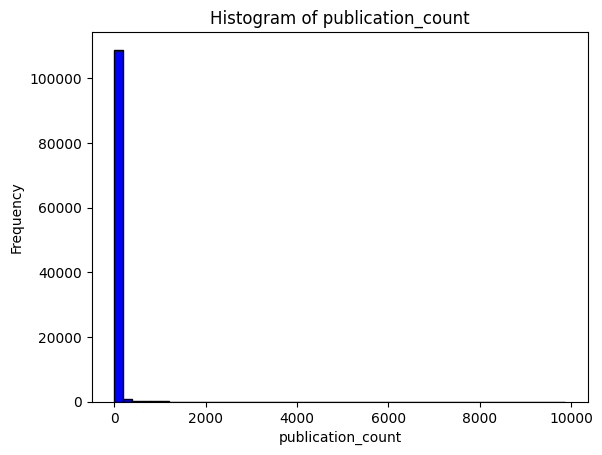

In [27]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
import pandas as pd

# Assuming 'genes' is a pre-defined PySpark DataFrame
genes_filtered = df_generifs_basic.groupBy('Gene ID').count().withColumnRenamed('count', 'publication_count')
max_publication_count = genes_filtered.agg(F.max("publication_count")).collect()[0][0]

# Show the top 10 genes by publication count
genes_filtered.orderBy(F.desc('publication_count')).show(100, truncate=False)

def plot_histogram(df, column):
    """
    Plot a histogram for a specified column in a PySpark DataFrame.
    """
    try:
        # Collect the data as a list and create a Pandas DataFrame
        data = df.select(column).rdd.flatMap(lambda x: x).collect()
        pandas_df = pd.DataFrame(data, columns=[column])

        num_bins = min(50, max_publication_count)  # Adjust the number of bins as needed

        # Plotting the histogram
        plt.hist(pandas_df[column], bins=num_bins, range=(0, max_publication_count), color='blue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

plot_histogram(genes_filtered, 'publication_count')

In [28]:
df_generifs_basic.where(F.col('Gene ID') == '7157').show(100, truncate=False)

+-------+---------------------+
|Gene ID|PubMed ID (PMID) list|
+-------+---------------------+
|7157   |15254760             |
|7157   |16287156             |
|7157   |16835507             |
|7157   |17130838             |
|7157   |17538794             |
|7157   |17545048             |
|7157   |17936556             |
|7157   |18256893             |
|7157   |18372207             |
|7157   |19098288             |
|7157   |19170196             |
|7157   |19216023             |
|7157   |19628749             |
|7157   |19799611             |
|7157   |19862502             |
|7157   |20190805             |
|7157   |20432164             |
|7157   |20544687             |
|7157   |20842446             |
|7157   |21115891             |
|7157   |21719749             |
|7157   |21857991             |
|7157   |22547059             |
|7157   |23049793             |
|7157   |23317213             |
|7157   |23403321             |
|7157   |23421999             |
|7157   |23718721             |
|7157   

In [13]:
!python3 --version

"python3" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [1]:
!where python

c:\Users\rodri\AppData\Local\Programs\Python\Python311\python.exe


In [29]:
def create_pubmed_url_dict(pubmed_ids):
    base_url = "https://pubmed.ncbi.nlm.nih.gov/"
    return {pubmed_id: base_url + str(pubmed_id) for pubmed_id in pubmed_ids}

# Example usage:
pubmed_ids = [15254760, 12345678]  # Replace with your PubMed IDs
url_dict = create_pubmed_url_dict(pubmed_ids)
print(url_dict)

{15254760: 'https://pubmed.ncbi.nlm.nih.gov/15254760', 12345678: 'https://pubmed.ncbi.nlm.nih.gov/12345678'}


In [30]:
import requests
from bs4 import BeautifulSoup
import re

def download_pubmed_document(pubmed_url):
    # Send a request to the PubMed URL
    response = requests.get(pubmed_url)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the link to the document
    # This is a simplified example, the actual class or id may vary
    link = soup.find('a', href=re.compile(r'.*pdf'))

    if link:
        pdf_url = link['href']
        # Download the document
        pdf_response = requests.get(pdf_url)
        pdf_response.raise_for_status()

        # Write the content to a file
        with open('document.pdf', 'wb') as file:
            file.write(pdf_response.content)

        print("Document downloaded successfully.")
    else:
        print("Document link not found.")

# Example usage
download_pubmed_document('https://pubmed.ncbi.nlm.nih.gov/16287156/')

Document link not found.
